# Most Freuent Value Imputation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./train.csv", usecols=['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


Lets check the amount of data missing in the data base

In [5]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Garage Quality column has less amount of missing values so we can implement the most frequent imputation in this case. Compared to the other case, the Fire Place Quality has much missing values

<Axes: xlabel='GarageQual'>

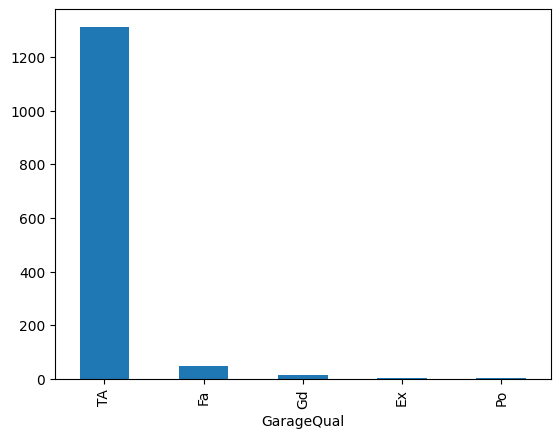

In [7]:
# Lets check the distribution of categories in Garage Quality column
df['GarageQual'].value_counts().plot(kind='bar')

So we can see that, the category TA is most repeated in this, so now we will fill the missing values in the data set with the value "TA" as it is the most frequently occurred value

### lets see the distribution graph for those entries having Guarage Quality as TA and those having value as null

<Axes: ylabel='Density'>

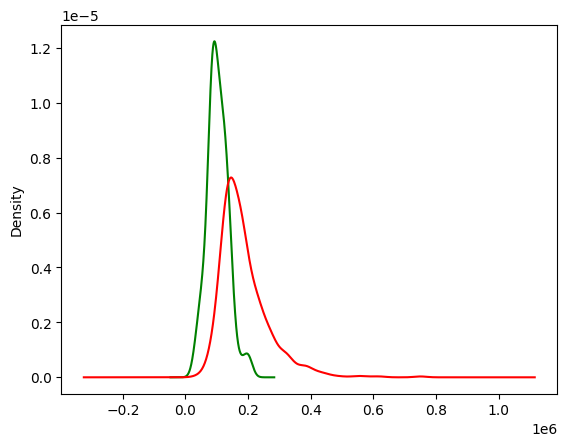

In [13]:
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', color='green')
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', color='red')

## Now we can fill the missing values by two ways, first we will fill manually giving the maximum occurring value

In [14]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

In [20]:
df['GarageQualNew']= df['GarageQual'].fillna("TA")

In [21]:
df.isnull().mean()*100

FireplaceQu      47.260274
GarageQual        5.547945
SalePrice         0.000000
GarageQualNew     0.000000
dtype: float64

We can observe that in the newly made column we have no missing values

## Now lets fill the value by simple imputer

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [23]:
imputer = SimpleImputer(strategy='most_frequent')

In [34]:
trf = ColumnTransformer(
    [
        ('t1', imputer, ['GarageQual'])
    ],
    remainder='passthrough'
)

In [35]:
dfNew = trf.fit_transform(df)

In [36]:
dfNew = pd.DataFrame(dfNew, columns=['GarageQual', 'FireplaceQa', 'SalePrice', 'GarageQualNew'])

In [37]:
dfNew.isnull().sum()

GarageQual         0
FireplaceQa      690
SalePrice          0
GarageQualNew      0
dtype: int64

Now we can see that we have no missing values in the garage qual

In [38]:
dfNew.to_csv("./train.csv")